In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [95]:
df = pd.read_csv('../../data/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [96]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

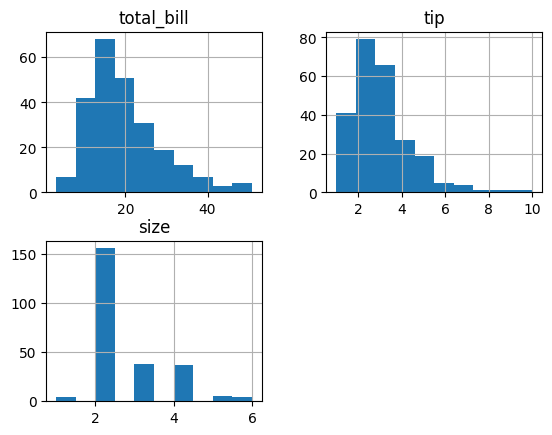

In [97]:
df.hist()

In [98]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [99]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [100]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [101]:
df.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [102]:
oe = OrdinalEncoder(dtype= int)
df[['smoker','time']] = oe.fit_transform(df[['smoker','time']])

In [103]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,0,2
1,10.34,1.66,Male,0,Sun,0,3
2,21.01,3.50,Male,0,Sun,0,3
3,23.68,3.31,Male,0,Sun,0,2
4,24.59,3.61,Female,0,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,0,3
240,27.18,2.00,Female,1,Sat,0,2
241,22.67,2.00,Male,1,Sat,0,2
242,17.82,1.75,Male,0,Sat,0,2


In [104]:
ohe = OneHotEncoder(dtype= int, sparse_output= False, drop='first')
codificado = ohe.fit_transform(df[['day','sex']])

In [105]:
codificado

array([[0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1,

In [106]:
df2 = pd.DataFrame(codificado,columns = ohe.get_feature_names_out(), index=df.index )

In [107]:
df2

,day_Sat,day_Sun,day_Thur,sex_Male
0,0,1,0,0
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,0
...,...,...,...,...
239,1,0,0,1
240,1,0,0,0
241,1,0,0,1
242,1,0,0,1


In [108]:
df = pd.concat((df,df2), axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,day_Sat,day_Sun,day_Thur,sex_Male
0,16.99,1.01,Female,0,Sun,0,2,0,1,0,0
1,10.34,1.66,Male,0,Sun,0,3,0,1,0,1
2,21.01,3.50,Male,0,Sun,0,3,0,1,0,1
3,23.68,3.31,Male,0,Sun,0,2,0,1,0,1
4,24.59,3.61,Female,0,Sun,0,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,0,3,1,0,0,1
240,27.18,2.00,Female,1,Sat,0,2,1,0,0,0
241,22.67,2.00,Male,1,Sat,0,2,1,0,0,1
242,17.82,1.75,Male,0,Sat,0,2,1,0,0,1


In [109]:
df_limpio = df.drop(columns=['sex','day'], axis=1)
df_limpio

,total_bill,tip,smoker,time,size,day_Sat,day_Sun,day_Thur,sex_Male
0,16.99,1.01,0,0,2,0,1,0,0
1,10.34,1.66,0,0,3,0,1,0,1
2,21.01,3.50,0,0,3,0,1,0,1
3,23.68,3.31,0,0,2,0,1,0,1
4,24.59,3.61,0,0,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,3,1,0,0,1
240,27.18,2.00,1,0,2,1,0,0,0
241,22.67,2.00,1,0,2,1,0,0,1
242,17.82,1.75,0,0,2,1,0,0,1


In [110]:
x = df_limpio.drop(columns='tip')
x

,total_bill,smoker,time,size,day_Sat,day_Sun,day_Thur,sex_Male
0,16.99,0,0,2,0,1,0,0
1,10.34,0,0,3,0,1,0,1
2,21.01,0,0,3,0,1,0,1
3,23.68,0,0,2,0,1,0,1
4,24.59,0,0,4,0,1,0,0
...,...,...,...,...,...,...,...,...
239,29.03,0,0,3,1,0,0,1
240,27.18,1,0,2,1,0,0,0
241,22.67,1,0,2,1,0,0,1
242,17.82,0,0,2,1,0,0,1


In [111]:
y = df_limpio['tip']
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

dividir entrenamiento

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,shuffle= True,random_state=42 )

In [113]:
x_train

,total_bill,smoker,time,size,day_Sat,day_Sun,day_Thur,sex_Male
228,13.28,0,0,2,1,0,0,1
208,24.27,1,0,2,1,0,0,1
96,27.28,1,0,2,0,0,0,1
167,31.71,0,0,4,0,1,0,1
84,15.98,0,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...
106,20.49,1,0,2,1,0,0,1
14,14.83,0,0,2,0,1,0,0
92,5.75,1,0,2,0,0,0,0
179,34.63,1,0,2,0,1,0,1


In [114]:
y_train

228    2.72
208    2.03
96     4.00
167    4.50
84     2.03
       ... 
106    4.06
14     3.02
92     1.00
179    3.55
102    2.50
Name: tip, Length: 195, dtype: float64

In [115]:
x_test

,total_bill,smoker,time,size,day_Sat,day_Sun,day_Thur,sex_Male
24,19.82,0,0,2,1,0,0,1
6,8.77,0,0,2,0,1,0,1
153,24.55,0,0,4,0,1,0,1
211,25.89,1,0,4,1,0,0,1
198,13.00,1,1,2,0,0,1,0
176,17.89,1,0,2,0,1,0,1
192,28.44,1,1,2,0,0,1,1
124,12.48,0,1,2,0,0,1,0
9,14.78,0,0,2,0,1,0,1
101,15.38,1,0,2,0,0,0,0


In [116]:
y_test

24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
176    2.00
192    2.56
124    2.52
9      3.23
101    3.00
45     3.00
233    1.47
117    1.50
177    2.00
82     1.83
146    1.36
200    4.00
15     3.92
66     2.47
142    5.00
33     2.45
19     3.35
109    4.00
30     1.45
186    3.50
120    2.31
10     1.71
73     5.00
159    2.00
156    5.00
112    4.00
218    1.44
25     2.34
60     3.21
18     3.50
119    2.92
97     1.50
197    5.00
139    2.75
241    2.00
75     1.25
127    2.00
113    2.55
16     1.67
196    2.00
67     1.00
168    1.61
38     2.31
195    1.44
Name: tip, dtype: float64

In [117]:
modelo = LinearRegression()

In [118]:
modelo.fit(x_train,y_train)

LinearRegression()

Predicciones

In [119]:
prediccion_con_testing = modelo.predict(x_test)

In [123]:
prediccion_con_testing.reshape(49,1)

array([[2.91436632],
       [2.00292613],
       [3.96425583],
       [3.76380832],
       [2.14836306],
       [2.67423448],
       [3.63934628],
       [2.29147245],
       [2.57207155],
       [2.45851225],
       [2.90446763],
       [2.0573337 ],
       [2.11817193],
       [2.35130838],
       [1.82976215],
       [3.10830675],
       [2.95140176],
       [3.21602976],
       [2.56640892],
       [5.73957295],
       [3.43490366],
       [3.22645102],
       [2.17139823],
       [1.94180002],
       [3.16394533],
       [2.24547894],
       [2.14497574],
       [3.21025435],
       [3.20097595],
       [6.66803147],
       [5.01111235],
       [1.57804024],
       [3.1909877 ],
       [2.76652194],
       [2.98412862],
       [3.85695724],
       [2.17008741],
       [5.46673999],
       [2.35586827],
       [2.99190732],
       [2.03271177],
       [2.48465991],
       [3.44046814],
       [2.35532237],
       [1.92528104],
       [0.87348926],
       [1.81911521],
       [3.040

In [124]:
y_test.values.reshape(49,1)

array([[3.18],
       [2.  ],
       [2.  ],
       [5.16],
       [2.  ],
       [2.  ],
       [2.56],
       [2.52],
       [3.23],
       [3.  ],
       [3.  ],
       [1.47],
       [1.5 ],
       [2.  ],
       [1.83],
       [1.36],
       [4.  ],
       [3.92],
       [2.47],
       [5.  ],
       [2.45],
       [3.35],
       [4.  ],
       [1.45],
       [3.5 ],
       [2.31],
       [1.71],
       [5.  ],
       [2.  ],
       [5.  ],
       [4.  ],
       [1.44],
       [2.34],
       [3.21],
       [3.5 ],
       [2.92],
       [1.5 ],
       [5.  ],
       [2.75],
       [2.  ],
       [1.25],
       [2.  ],
       [2.55],
       [1.67],
       [2.  ],
       [1.  ],
       [1.61],
       [2.31],
       [1.44]])

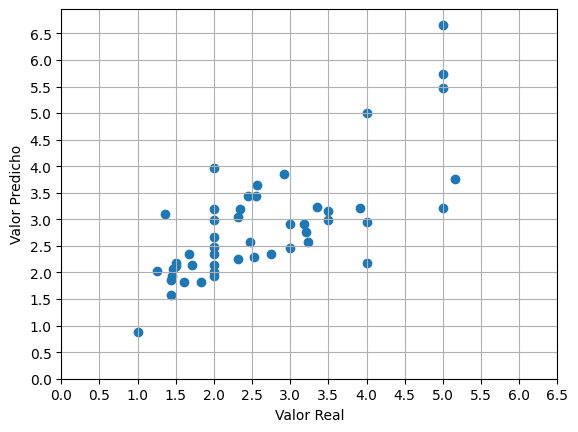

In [129]:
plt.scatter(y_test,prediccion_con_testing)
plt.xticks(np.arange(0,7,0.5))
plt.yticks(np.arange(0,7,0.5))
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.grid()
plt.show()


In [128]:
metrics.mean_absolute_error(y_test, prediccion_con_testing)

0.6671331480264895